## **Linear Regression using sklearn API**

In [197]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, learning_curve, ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [198]:
np.random.seed(306)
plt.style.use('seaborn')

In [199]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

### **STEP 1**: Loading the dataset

In [200]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [201]:
print('Shape of feature matrix :', features.shape)
print('Shape of label vector :', labels.shape)

Shape of feature matrix : (20640, 8)
Shape of label vector : (20640,)


### **STEP 2**: Data exploration

### **STEP 3**: Preprocessing and Model Building

##### 3.1 train_test_split

In [202]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)

In [203]:
features_train.shape, features_test.shape

((15480, 8), (5160, 8))

In [204]:
# some validations

assert features_train.shape[0] == labels_train.shape[0]
assert features_test.shape[0] == labels_test.shape[0]

##### 3.2 Pipeline: Preprocessing and Model

In [205]:
linreg_pipeline = Pipeline([('std_scaler', StandardScaler()),
                            ('lin_reg', LinearRegression())])

linreg_pipeline.fit(features_train, labels_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [206]:
print('intercept :', linreg_pipeline['lin_reg'].intercept_)
print('weight vector :', linreg_pipeline['lin_reg'].coef_)

intercept : 2.0703489205426377
weight vector : [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


### **STEP 4**: Model Evaluation

In [207]:
test_score = linreg_pipeline.score(features_test, labels_test)
print('Model performance on test set :', test_score)

train_score = linreg_pipeline.score(features_train, labels_train)
print('Model performance on train set :', train_score)

Model performance on test set : 0.5910509795491352
Model performance on train set : 0.609873031052925


##### Cross Validated Score

In [208]:
linreg_score = cross_val_score(linreg_pipeline,
                                features_train,
                                labels_train,
                                scoring = 'neg_mean_squared_error',
                                cv = shuffle_split_cv)

print(linreg_score)

print(f'\nScore of linear reg model on the test set :\n'f'{linreg_score.mean():.3f} +/- {linreg_score.std():.3f}')

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Score of linear reg model on the test set :
-0.529 +/- 0.022


In [209]:
linreg_mse = -linreg_score
print(f'\nMSE of linear reg model on the test set :\n'f'{linreg_mse.mean():.3f} +/- {linreg_mse.std():.3f}')


MSE of linear reg model on the test set :
0.529 +/- 0.022


##### Cross Validation

In [210]:
linreg_cv_results = cross_validate(linreg_pipeline,
                                    features_train,
                                    labels_train,
                                    cv = shuffle_split_cv,
                                    scoring = 'neg_mean_squared_error',
                                    return_train_score=True,
                                    return_estimator=True)

In [211]:
linreg_cv_results

{'fit_time': array([0.00800014, 0.008003  , 0.00801253, 0.01601768, 0.00799799,
        0.00800061, 0.00800204, 0.00800204, 0.00800014, 0.00800204]),
 'score_time': array([0.        , 0.00799966, 0.00798798, 0.        , 0.        ,
        0.00800109, 0.00799823, 0.00800133, 0.00800133, 0.0079999 ]),
 'estimator': [Pipeline(steps=[('std_scaler', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('std_scaler', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('std_scaler', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('std_scaler', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('std_scaler', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('std_scaler', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('std_scaler', StandardScaler()),
   

In [212]:
train_error = -1 * linreg_cv_results['train_score']
test_error = -1 * linreg_cv_results['test_score']

print(f'\nMSE of linear reg model on the train set :\n'f'{train_error.mean():.3f} +/- {train_error.std():.3f}')
print(f'\nMSE of linear reg model on the test set :\n'f'{test_error.mean():.3f} +/- {test_error.std():.3f}')


MSE of linear reg model on the train set :
0.519 +/- 0.006

MSE of linear reg model on the test set :
0.529 +/- 0.022


**Effect of training set size on error**

In [213]:
def plot_learning_curve(train_sizes, train_scores, test_scores) :
    train_scores_mean = np.mean(-train_scores, axis = 1)
    train_scores_std = np.std(-train_scores, axis = 1)
    test_scores_mean = np.mean(-test_scores, axis = 1)
    test_scores_std = np.std(-test_scores, axis = 1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha = 0.1,
        color = 'r'
    )

    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_mean,
        test_scores_mean + test_scores_std,
        alpha = 0.1,
        color = 'g'
    )

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g')
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


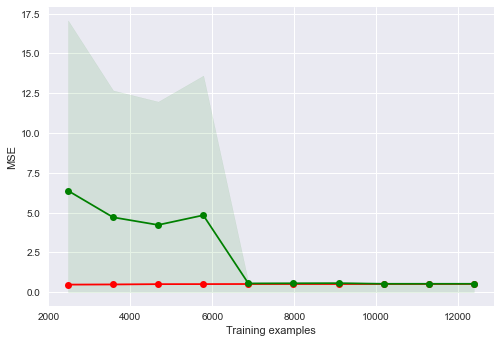

In [214]:
(train_sizes, train_scores, test_scores, fit_times, score_times) = learning_curve(linreg_pipeline, features_train, labels_train, cv = shuffle_split_cv, scoring = 'neg_mean_squared_error', n_jobs = 1, return_times = True, train_sizes = np.linspace(0.2, 1, 10))
plot_learning_curve(train_sizes, train_scores, test_scores)

In [215]:
def plot_scalability_curve(train_sizes, fit_times):
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times, axis = 1)

    plt.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha = 0.1,
        color = 'b'
    )

    plt.plot(train_sizes, fit_times_mean, 'o-', color = 'b')
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


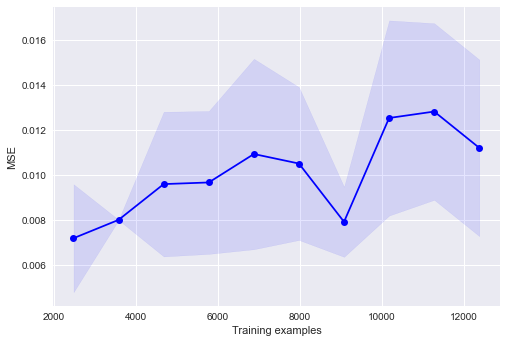

In [216]:
plot_scalability_curve(train_sizes, fit_times)

**Model Examination**

In [217]:
feature_names = features_train.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Text(0.5, 1.0, 'Linear regression coefficients')

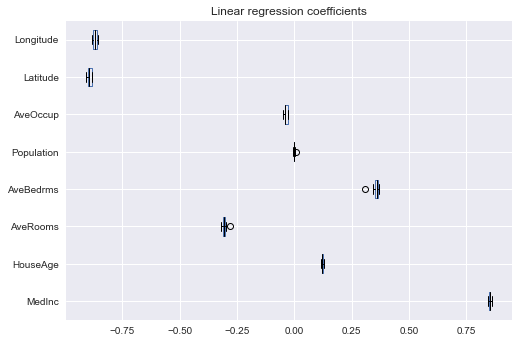

In [218]:
coefs = [est[-1].coef_ for est in linreg_cv_results['estimator']]
weights_df = pd.DataFrame(coefs, columns = feature_names)

color = {'whiskers': 'black', 'medians': 'black', 'caps': 'black'}
weights_df.plot.box(color = color, vert = False)
plt.title('Linear regression coefficients')

In [219]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


**Selecting best model**

In [220]:
best_model_index = np.argmin(test_error)
selected_model = linreg_cv_results['estimator'][best_model_index]

In [221]:
print('Intercept :', selected_model['lin_reg'].intercept_)
print('Coefficient :', selected_model['lin_reg'].coef_)

Intercept : 2.0779898917958657
Coefficient : [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


**Model Performance**

In [222]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(linreg_pipeline, features_train, labels_train)

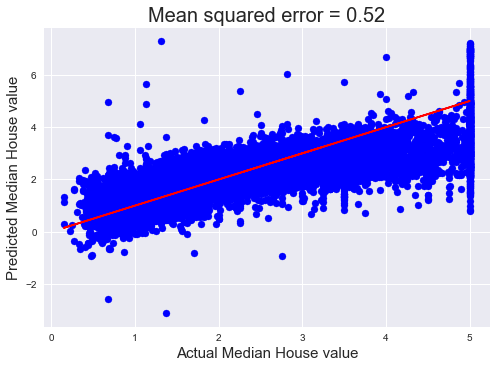

In [223]:
mse_cv = mean_squared_error(labels_train, cv_predictions)

plt.scatter(labels_train, cv_predictions, color = 'blue')
plt.plot(labels_train, labels_train, 'r-')
plt.title(f'Mean squared error = {mse_cv:.2f}', size = 20)
plt.xlabel(f'Actual Median House value', size = 15)
plt.ylabel(f'Predicted Median House value', size = 15)
plt.show()

### **STEP 5**: Predictions

In [224]:
test_predictions_cv = selected_model.predict(features_test)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [225]:
test_predictions = linreg_pipeline.predict(features_test)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

### **STEP 6**: Report Model Performance

In [226]:
score_cv = selected_model.score(features_test, labels_test)
score = linreg_pipeline.score(features_test, labels_test)

score_cv, score

(0.5923577635319088, 0.5910509795491352)

In [227]:
mse_cv = mean_squared_error(labels_test, test_predictions_cv)
mse = mean_squared_error(labels_test, test_predictions)

mse_cv, mse

(0.5393995876218523, 0.5411287478470688)

##### **Exercise:**
1. Change the scoring scheme to other scoring metrics provided in sklearn metrics and compare results across different metrics.
2. Repeat the modelling steps with SGDRegressor.

## **Baseline Models**

#### Imports

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, permutation_test_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We will use ShuffleSplit as a cross validation strategy.

In [229]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

Loading the data and splitting

In [230]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)

#### LinearRegression Classifier
- Build linear reg model with feature scaling as part of a pipeline.
- Train the model with 10 fold cv via ShuffleSplit
- Capture errors on different folds

In [231]:
linreg_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                            ('lin_reg', LinearRegression())])

linreg_cv_results = cross_validate(linreg_pipeline,
                                    features_train,
                                    labels_train,
                                    cv = shuffle_split_cv,
                                    scoring = 'neg_mean_squared_error',
                                    n_jobs = 2)

linreg_errors = pd.Series(-linreg_cv_results['test_score'], name = 'Linear regression error')

#### DummyRegressor

In [232]:
def dummy_regressor_baseline(strategy, constant_val = None, quantile_val = None) :
    baseline_model_median = DummyRegressor(strategy=strategy, constant=constant_val, quantile=quantile_val)
    baseline_median_cv_results = cross_validate(baseline_model_median, features_train, labels_train, cv = shuffle_split_cv, scoring = 'neg_mean_absolute_error', n_jobs = 2)
    return pd.Series(-baseline_median_cv_results['test_score'], name = 'Dummy regressor error')

In [233]:
baseline_median_cv_results_errors = dummy_regressor_baseline(strategy = 'median')
baseline_mean_cv_results_errors = dummy_regressor_baseline(strategy = 'mean')
baseline_constant_cv_results_errors = dummy_regressor_baseline(strategy = 'constant', constant_val = 2)
baseline_quantile_cv_results_errors = dummy_regressor_baseline(strategy='quantile', quantile_val = 0.55)

Let's compare performance of these dummy regressors

In [234]:
dummy_error_df = pd.concat([baseline_median_cv_results_errors,
                            baseline_mean_cv_results_errors,
                            baseline_constant_cv_results_errors,
                            baseline_quantile_cv_results_errors], axis = 1)

dummy_error_df.columns = ['Median CV', 'Mean CV', 'Constant CV', 'Quantile CV']

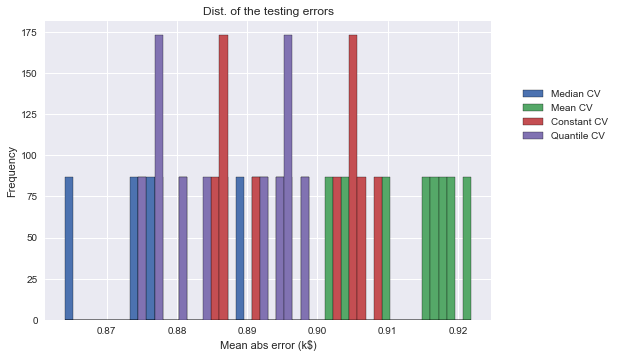

In [235]:
dummy_error_df.plot.hist(bins = 50, density = True, edgecolor = 'black')
plt.legend(bbox_to_anchor = (1.05, 0.8), loc = 'upper left')
plt.xlabel('Mean abs error (k$)')
_ = plt.title('Dist. of the testing errors')

#### permutation_test_score

It permutes the target to generate randomized data and computes the empirical p-value against the null hypothesis, that features and targets are independent.

Here we are interested in permutation_score returned by this API, which indicates score of the model on different permutations.

In [236]:
score, permutation_score, pvalue = permutation_test_score(linreg_pipeline,
                                                        features_train,
                                                        labels_train,
                                                        cv = shuffle_split_cv,
                                                        scoring = 'neg_mean_squared_error',
                                                        n_jobs = 2, n_permutations=30)
permutation_errors = pd.Series(-permutation_score, name = 'Permuted error')

In [237]:
permutation_score

array([-1.34055624, -1.35092809, -1.33973821, -1.33524163, -1.33930439,
       -1.33435548, -1.34903524, -1.3211619 , -1.33003683, -1.34515979,
       -1.32985999, -1.33174909, -1.34782171, -1.34188997, -1.3145259 ,
       -1.33296663, -1.32653128, -1.35052705, -1.31609823, -1.34020788,
       -1.35499089, -1.33773031, -1.32445649, -1.33188211, -1.33549437,
       -1.34301672, -1.32135087, -1.32164084, -1.32567798, -1.34478303])

#### Model Comparison

In [238]:
error_df = pd.concat([linreg_errors, baseline_median_cv_results_errors, permutation_errors], axis = 1)

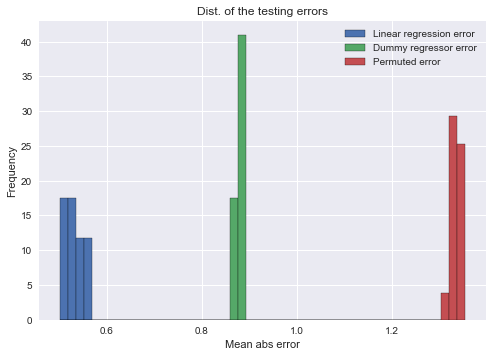

In [239]:
error_df.plot.hist(bins = 50, density = True, edgecolor = 'black')
plt.legend(loc = 'best')
plt.xlabel('Mean abs error')
_ = plt.title('Dist. of the testing errors')

Our model has better performance than the two baselines. However our model needs to improve it further.

## **Linear Regression with Iterative Optimization: SGDRegressor**